# 2. Übung Nichtlineare Regelungstechnik 1, Aufgabe 2

## Analyse eines nichtlinearen Systems in der Nähe seiner Ruhelagen

System:

\begin{align*}
\dot x_1 &= x_1 - x_2\\
\dot x_2 &= 3 x_2 (1-x_1^2)
\end{align*}

mit $(x_1,x_2) \in \mathbb{R}$

In diesem Notebook wird demonstriert, wie die Analyse eines nichtlinearen 
Systems in der Nähe seiner Ruhelagen durch Linearisierung unter Zuhilfenahme
von Python auf einem Rechner erfolgen kann.

---

Die aktuelle Fassung dieses Notebooks findet sich in folgendem Repositorium:

https://gitlab.hrz.tu-chemnitz.de/rst/public/teaching/nl1-nbviewer-content

Sie können zur Entwicklung/ Verbesserung über Merge Requests beitragen!

---

<p style="font-family:Courier New; font-size:10pt">
Copyright (c) 2021-2023 Philipp Daferner, Jan Winkler, TU Dresden, Germany
</p>

<p style="font-family:Courier New; font-size:10pt">
This program is free software: you can redistribute it and/or modify<br>
it under the terms of the GNU General Public License as published by<br>
the Free Software Foundation, either version 3 of the License, or<br>
(at your option) any later version.
</p>
    
<p style="font-family:Courier New; font-size:10pt">
This program is distributed in the hope that it will be useful,<br>
but WITHOUT ANY WARRANTY; without even the implied warranty of<br>
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the<br>
GNU General Public License for more details: <br>
<a href=https://www.gnu.org/licenses/gpl-3.0.txt>https://www.gnu.org/licenses/gpl-3.0.txt</a>.
</p>

---

## Vorbereitungen

### Pakete

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

### Erweiterungen

In [2]:
# Erweiterung, damit Gleichungen im LaTeX-Format angezeigt werden
from sympy.interactive import printing
printing.init_printing()

## Berechnung

### System

Die Systemgleichungen werden zunächst mithilfe des SymPy-Pakets angelegt. Dieses ermöglicht das symbolische Rechnen. Zunächst werden die Symbole definiert (hier $x_1$ und $x_2$), anschließend das Vektorfeld $f(x_1, x_2)$.

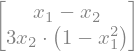

In [3]:
x1, x2 = sp.symbols('x1, x2')
f = sp.Matrix([x1 - x2, 3 * x2 * (1 - x1**2)])
f

### Ruhelagen
Zur Bestimmung der Ruhelagen werden die Nullstellen der Systemgleichungen berechnet:

In [4]:
sp.solve(f, [x1, x2])

Es gibt also drei Ruhelagen, die nachfolgend analysiert werden.

### Jacobi-Matrix
Zunächst wird die allgemeine Jacobi-Matrix berechnet:

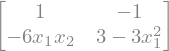

In [5]:
Df = f.jacobian([x1, x2])
Df

### Eigenwerte und -vektoren (symbolisch)
Die Bestimmung der Eigenwerte und -vektoren mit symbolischer Rechnung soll an der Ruhelage $\mathbf{x}_{0,1} = (-1,-1)$ gezeigt werden. Hierzu wird die Jacobi-Matrix an der ersten Ruhelage ausgewertet: 

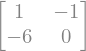

In [6]:
Df_1 = Df.subs([(x1, -1), (x2, -1)])
Df_1

Die Eigenwerte und -vektoren können mithilfe der SymPy-Funktion `eigenvects` ([Doku...](https://docs.sympy.org/latest/modules/matrices/matrices.html#sympy.matrices.matrices.MatrixEigen.eigenvects)) einfach berechnet werden. Das Ergebnis ist eine Liste von Tupeln, wobei jedes Tupel die gewünschten Informationen pro Eigenwert enthält: `[(Eigenwert, algebraische Vielfachheit, [zugehörige Eigenvektoren]), (...), (...), ...]`.

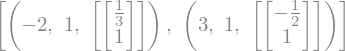

In [7]:
Df_1.eigenvects()

Diese Ruhelage hat also die Eigenwerte $(-2, 3)$, also ein instabiler Sattelpunkt. Die stabile bzw. instabile Richtung werden durch die Eigenvektoren beschrieben.

**Wichtig**: Dieses Vorgehen führt nicht immer zum Erfolg. Daher wird nachfolgend eine numerische Methode vorgestellt. Da die Jacobimatrix nach dem Auswerten an der Gleichgewichtslage nur noch Zahlen enthält, macht es ohnehin nicht mehr soviel Sinn, weiter symbolisch zu rechnen.

### Eigenwerte und -vektoren (numerisch)

Ab hier rechnen wir numerisch weiter. Dazu muss die symbolisch berechnete Jacobimatrix in eine Funktion überführt werden, welche einen numerischen Ausdruck zurückliefert, d.h. keinen SymPy-Ausdruck zurückliefert. Diesen Vorgang nennt man **lambdify**:

In [8]:
Df_fnc = sp.lambdify((x1, x2), Df, modules='numpy')

`Df` ist ein symbolischer Ausdruck (hier die Jacobi-Matrix), `x1, x2` sind die Variablen für die numerische Auswertung, `Df_fnc` ist die Funktion, die die Jacobimatrix an `x1, x2` auswertet. Nutzung: `A = Df_fnc(2, 3)` liefert die Jacobi-Matrix ausgewertet bei (2,3).

Zur Bestimmung der Eigenwerte wird die Jacobi-Matrix an den Ruhelagen ausgewertet.
#### Ruhelage $\mathbf{x}_{0,1} = (-1,-1)$:

Jacobi-Matrix ausgewertet bei $\mathbf{x}_{0,1}$:

In [9]:
Df_1 = Df_fnc(-1,-1)
Df_1

array([[ 1, -1],
       [-6,  0]])

Bestimmung der Eigenwerte und Eigenvektoren mit Hilfe von NumPy. Die Funktion lautet `eig` aus dem Numpy-linalg-Modul ([Doku...](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html))

In [10]:
sp.pprint(np.linalg.eig(Df_1))
## pprint verwenden?

⎛[ 3. -2.],  [[ 0.4472136   0.31622777]⎞
⎝            [-0.89442719  0.9486833 ]]⎠


Wie oben beschrieben handelt es sich um einen instabilen Sattelpunkt. Die Eigenvektoren sind hier anders skaliert.

### Grafische Darstellung

Das Verhalten des linearisierten Systems wird um die Ruhelage $x_{1e}$ und $x_{2e}$ gezeichnet. Genutzt wird die Funktion `streamplot` aus der `Matplotlib`-Bibliothek ([Doku...](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.streamplot.html)). Es gilt mit $\delta x_1 = x_1 - x_{1e}$ und $\delta x_2 = x_2 - x_{2e}$ und der an der Ruhelage ausgewerteten Jacobimatrix

\begin{equation*}
A = \begin{pmatrix} a_{11} & a_{12} \\ a_{21} & x_{22} \end{pmatrix}
\end{equation*}
folgendes:
\begin{align*}
\delta \dot x_1 &= a_{11} \delta x_1 + a_{12} \delta x_2\\
\delta \dot x_2 &= a_{21} \delta x_1 + a_{22} \delta x_2
\end{align*}

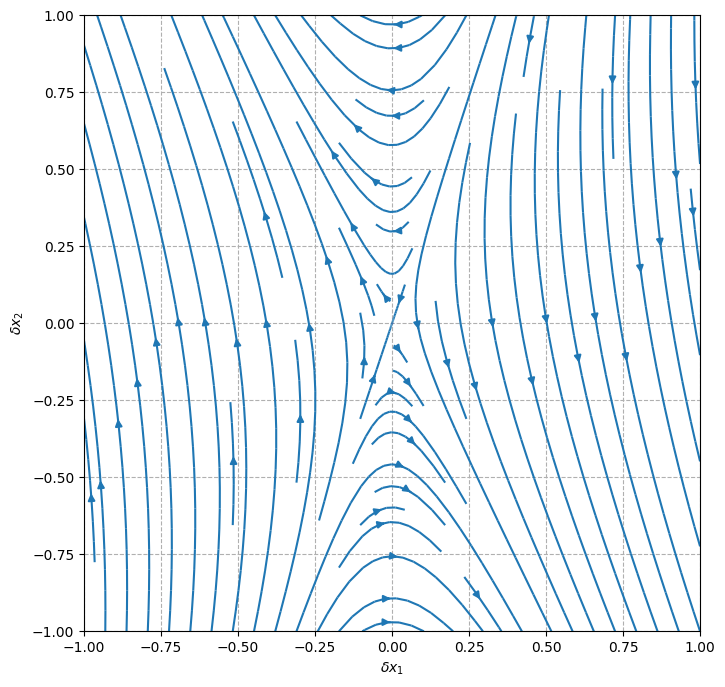

In [11]:
# delta-x1 - delta-x2-Ebene definieren
dxmax = 1
dx1, dx2 = np.meshgrid(np.linspace(-dxmax, dxmax, 10), np.linspace(-dxmax, dxmax, 10))

# Gleichungen des linearisierten Sytems
[[a11, a12], [a21, a22]] = Df_1
dx1dot = a11 * dx1 + a12 * dx2
dx2dot = a21 * dx1 + a22 * dx2

# Plotten
plt.figure(figsize=(8,8))
plt.streamplot(dx1, dx2, dx1dot, dx2dot)
plt.grid(linestyle='--')
plt.xlabel('$\delta x_1$')
plt.ylabel('$\delta x_2$')
plt.gca().set_aspect("equal", "box")

#### Ruhelage $\mathbf{x}_{0,2} = (0,0)$:

Jacobi-Matrix ausgewertet bei $\mathbf{x}_{0,2}$:

In [12]:
Df_2 = Df_fnc(0,0)
Df_2

array([[ 1, -1],
       [ 0,  3]])

Eigenwerte und Eigenvektoren

In [13]:
sp.pprint(np.linalg.eig(Df_2))

⎛[1. 3.],  [[ 1.         -0.4472136 ]⎞
⎝          [ 0.          0.89442719]]⎠


In dieser Ruhelage hat das System einen instabilen Knoten.

Plot des linearisierten Systems um die Ruhelage:

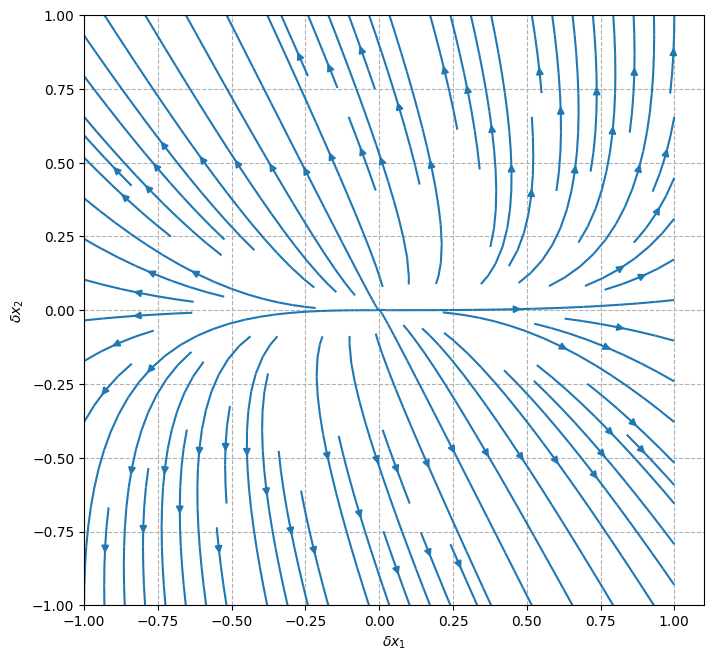

In [14]:
# x1-x2-Ebene definieren
dxmax = 1
dx1, dx2 = np.meshgrid(np.linspace(-dxmax, dxmax, 10), np.linspace(-dxmax, dxmax, 10))

# Gleichungen des linearisierten Sytems
[[a11, a12], [a21, a22]] = Df_2
dx1dot = a11 * dx1 + a12 * dx2
dx2dot = a21 * dx1 + a22 * dx2

# Plotten
plt.figure(figsize=(8,8))
plt.streamplot(dx1, dx2, dx1dot, dx2dot)
plt.grid(linestyle='--')
plt.xlabel('$\delta x_1$')
plt.ylabel('$\delta x_2$')
plt.gca().set_aspect("equal", "box")

#### Ruhelage $\mathbf{x}_{0,3} = (1,1)$:

Jacobi-Matrix ausgewertet bei $\mathbf{x}_{0,3}$:

In [15]:
Df_3 = Df_fnc(1,1)
Df_3

array([[ 1, -1],
       [-6,  0]])

Eigenwerte und Eigenvektoren

In [16]:
sp.pprint(np.linalg.eig(Df_3))

⎛[ 3. -2.],  [[ 0.4472136   0.31622777]⎞
⎝            [-0.89442719  0.9486833 ]]⎠


Bei dieser Ruhelage befindet sich also ebenfalls ein instabiler Sattelpunkt, was aufgrund der Punktsymmetrie zum Koordinatenursprung des Systems zu erwarten war.
Plot des linearisierten Systems um die Ruhelage:

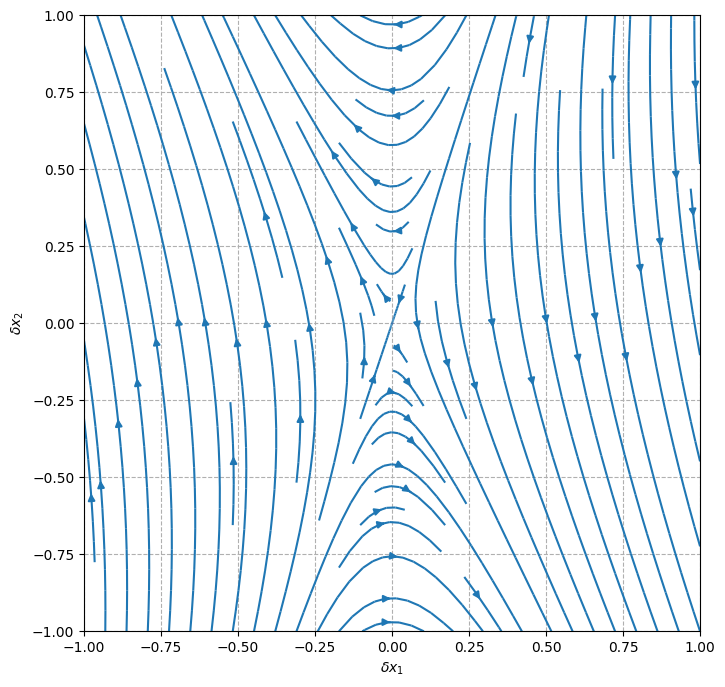

In [17]:
# x1-x2-Ebene definieren
dxmax = 1
dx1, dx2 = np.meshgrid(np.linspace(-dxmax, dxmax, 10), np.linspace(-dxmax, dxmax, 10))

# Gleichungen des linearisierten Sytems
[[a11, a12], [a21, a22]] = Df_3
dx1dot = a11 * dx1 + a12 * dx2
dx2dot = a21 * dx1 + a22 * dx2

# Plotten
plt.figure(figsize=(8,8))
plt.streamplot(dx1, dx2, dx1dot, dx2dot)
plt.grid(linestyle='--')
plt.xlabel('$\delta x_1$')
plt.ylabel('$\delta x_2$')
plt.gca().set_aspect("equal", "box")

### Phasenportrait des nichtlinearen Gesamtsystems
Abschließend wird nun noch das Phasenportrait des Gesamtsystems mit allen Ruhelagen dargestellt.

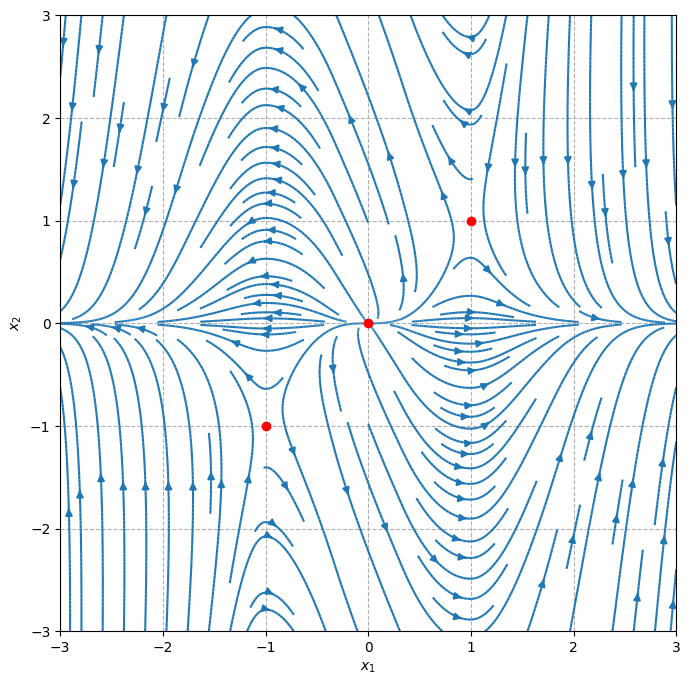

In [18]:
# Formatierung
xmax = 3
x1, x2 = np.meshgrid(np.linspace(-xmax, xmax, 10), np.linspace(-xmax, xmax, 10))

# Systemgleichungen
x1dot = x1 - x2
x2dot = 3 * x2 * (1 - x1**2)

# Plotten
plt.figure(figsize=(8,8))
plt.streamplot(x1, x2, x1dot, x2dot, density=[1, 5])
plt.plot(-1, -1, 'ro', 0, 0, 'ro', 1, 1, 'ro')  # Ruhelagen
plt.grid(linestyle='--')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.gca().set_aspect("equal", "box")